# Experiments for the time-dependent problem

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_time_dependent import plot_level_set_time_dependent
from Hamiltonians.time_dependent_LxF import Eikonal_sq_LxF_Euler_explicit
from PointSampling.time_dependent import data_gen_cube_T
from NeuralNetworks.NNs import FCFF_3L, FCFF_4L

#Right-hand-side of the PDE
def f(X):    
    return -.5*(X**2).sum(-1) 

def c(X):
    return .5 


training_params = {
    'numerical_scheme': Eikonal_sq_LxF_Euler_explicit,

    'f': f,
    'c': c,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

In [2]:
# Dimension of the d-dimensional cube for each experiment
dim_list = 3*[2] + 3*[5]
# Number of neurons per hidden layer
arch_list = [2*[50], 3*[50], 3*[50]]  + [2*[80], 3*[80], 3*[80]]

n_experiments = len(dim_list)
side_length = 6.
T = .5


# Parameters for each experiment
delta_x_list = [[.5, .3, .2, .1]]*n_experiments
delta_t_list = [[.05, .03, .02, .01]]*n_experiments
alpha_list = [[2.5, 2., 1.5, 1.]]*n_experiments
rounds = len(alpha_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[40]*rounds]*n_experiments
num_iterations_list = [[2000]*rounds,
                      [2000]*rounds,
                      [2000, 3000, 5000, 8000],
                      [8000]*rounds,
                      [8000]*rounds,
                      [8000, 10000, 15000, 20000]]
n_experiments_rep = 10

100%|██████████| 2000/2000 [00:14<00:00, 140.78it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


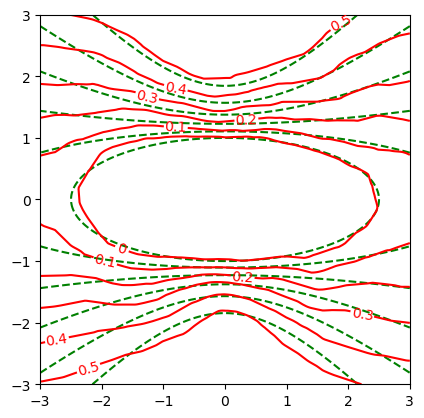

100%|██████████| 2000/2000 [00:19<00:00, 104.42it/s]


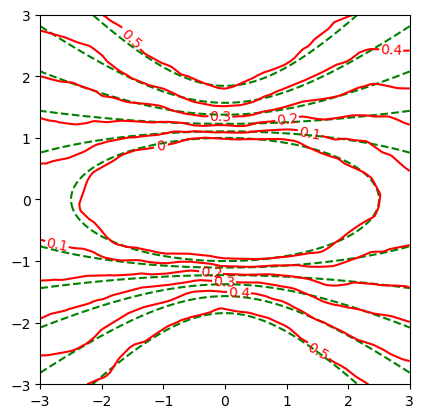

100%|██████████| 2000/2000 [00:18<00:00, 106.68it/s]


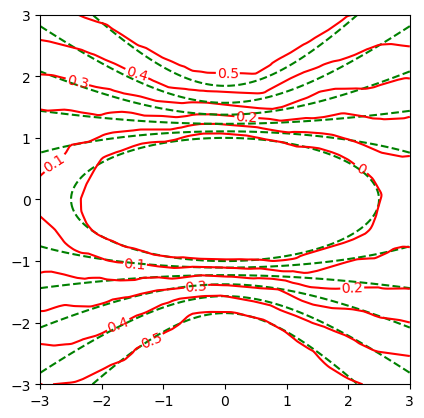

100%|██████████| 2000/2000 [00:17<00:00, 111.80it/s]


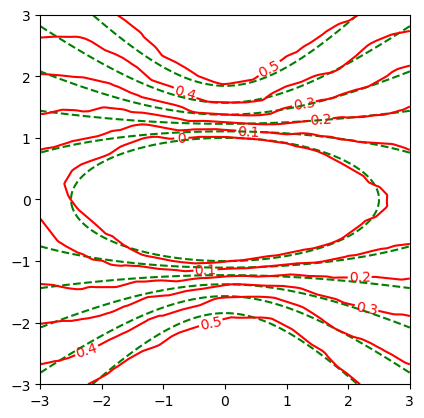

100%|██████████| 2000/2000 [00:16<00:00, 122.86it/s]


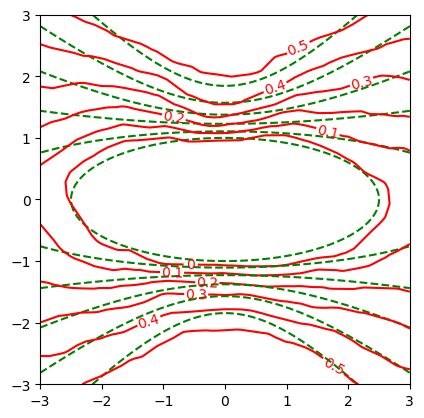

100%|██████████| 2000/2000 [00:10<00:00, 195.11it/s]


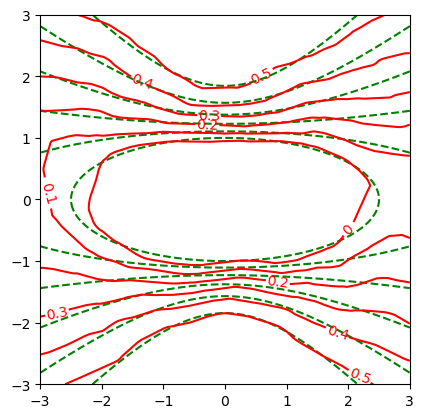

100%|██████████| 2000/2000 [00:11<00:00, 178.10it/s]


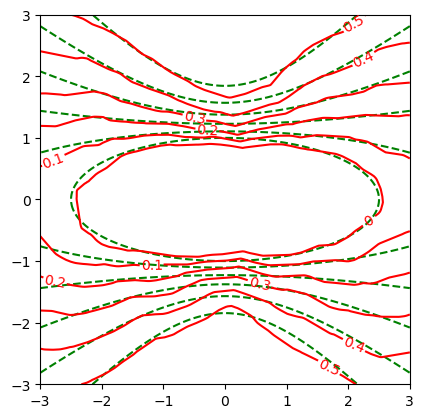

100%|██████████| 2000/2000 [00:14<00:00, 133.44it/s]


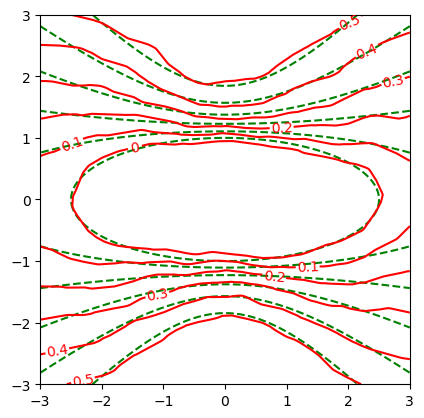

100%|██████████| 2000/2000 [00:15<00:00, 125.13it/s]


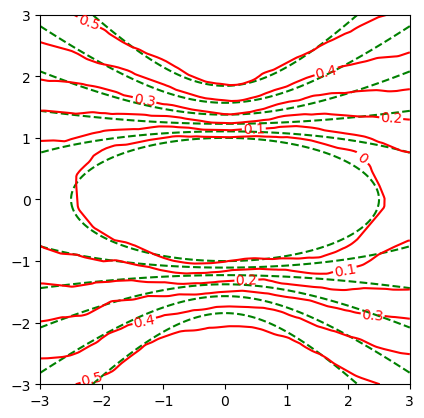

100%|██████████| 2000/2000 [00:15<00:00, 132.98it/s]


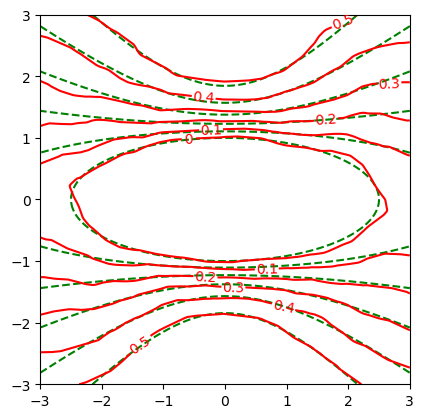

100%|██████████| 2000/2000 [00:16<00:00, 122.63it/s]


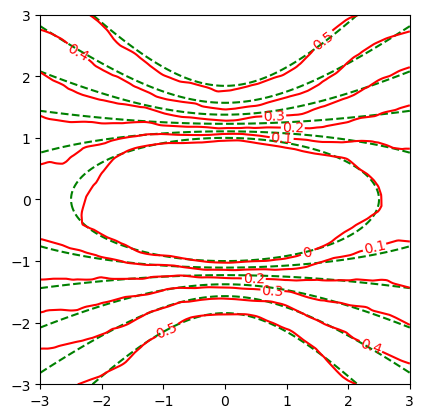

100%|██████████| 2000/2000 [00:16<00:00, 121.94it/s]


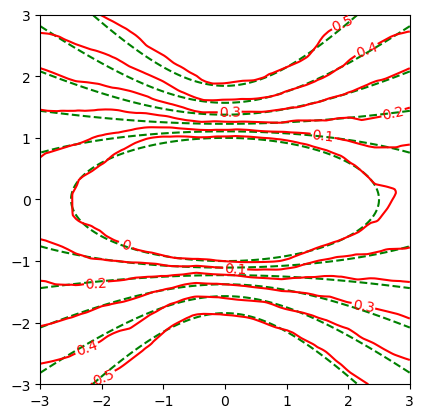

100%|██████████| 2000/2000 [00:14<00:00, 141.20it/s]


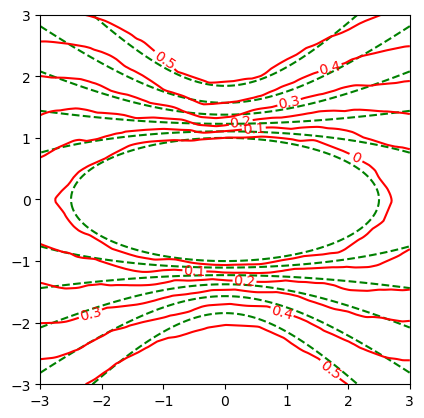

100%|██████████| 2000/2000 [00:13<00:00, 144.15it/s]


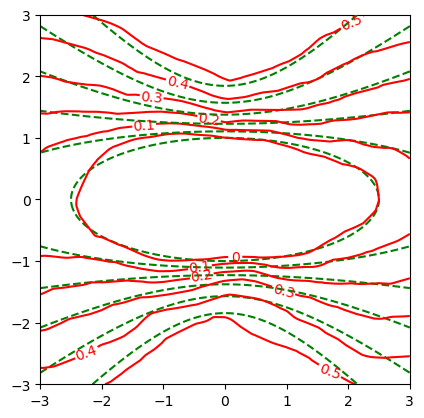

100%|██████████| 2000/2000 [00:15<00:00, 130.83it/s]


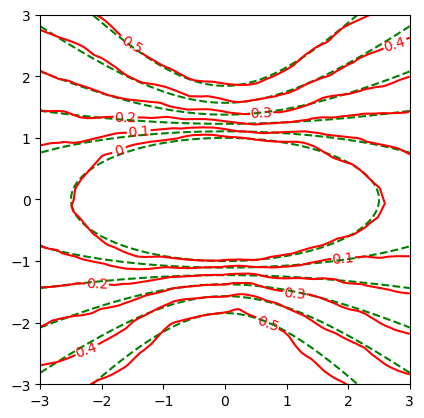

100%|██████████| 2000/2000 [00:15<00:00, 125.83it/s]


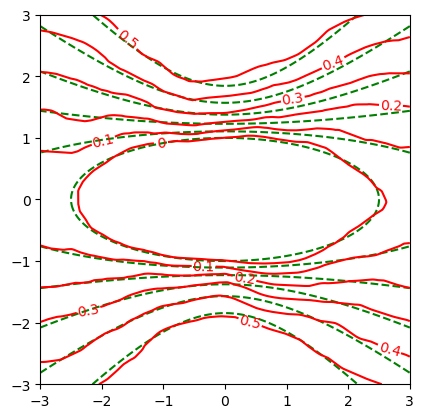

100%|██████████| 2000/2000 [00:17<00:00, 117.32it/s]


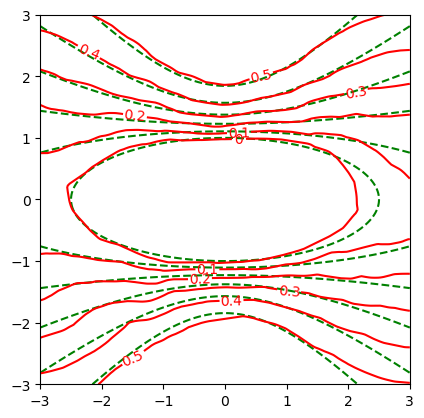

100%|██████████| 2000/2000 [00:13<00:00, 153.06it/s]


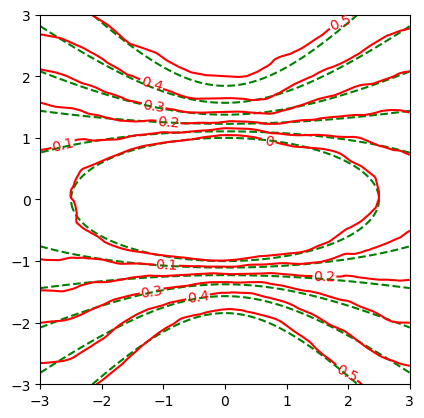

100%|██████████| 2000/2000 [00:16<00:00, 122.72it/s]


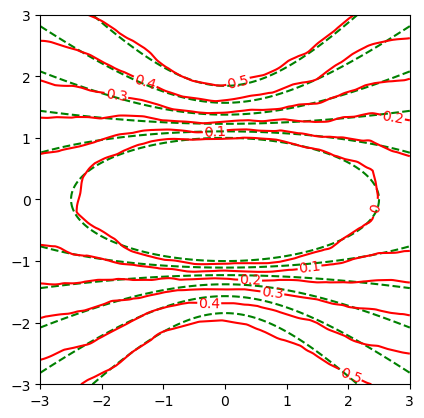

100%|██████████| 2000/2000 [00:15<00:00, 128.08it/s]


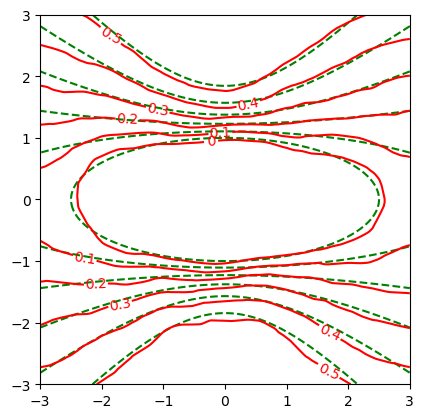

100%|██████████| 8000/8000 [01:08<00:00, 117.55it/s]


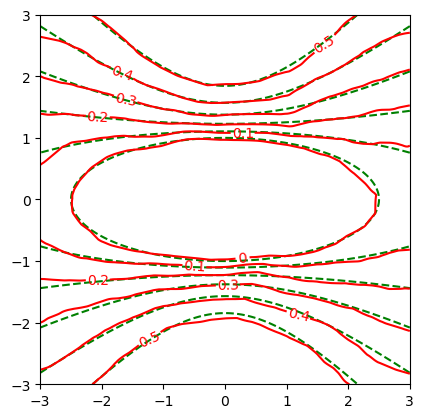

100%|██████████| 8000/8000 [00:55<00:00, 144.47it/s]


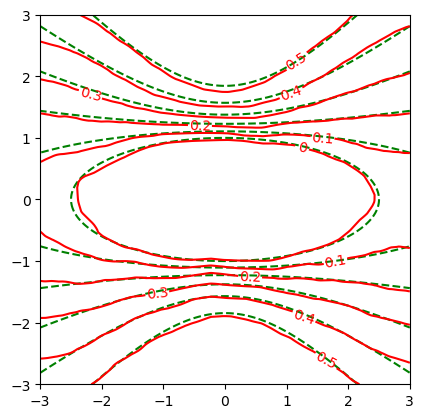

100%|██████████| 8000/8000 [00:58<00:00, 136.81it/s]


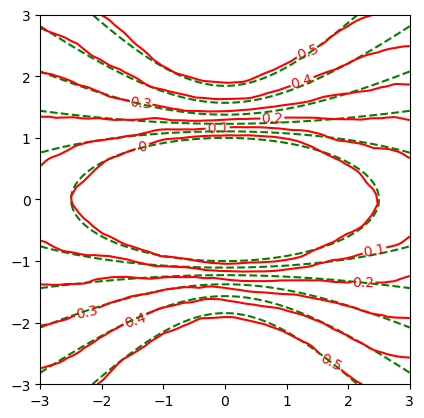

100%|██████████| 8000/8000 [01:05<00:00, 122.83it/s]


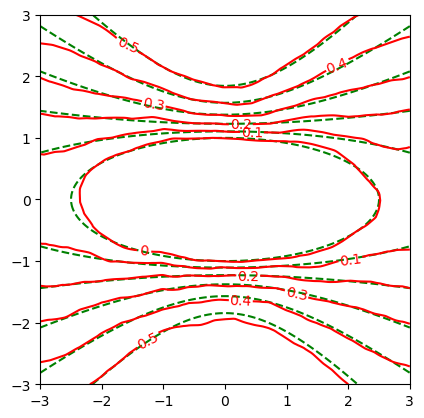

100%|██████████| 8000/8000 [01:02<00:00, 128.97it/s]


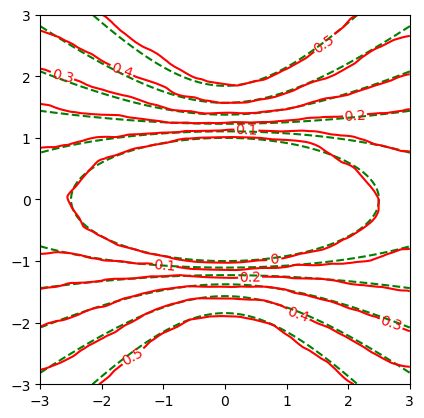

100%|██████████| 8000/8000 [01:03<00:00, 125.91it/s]


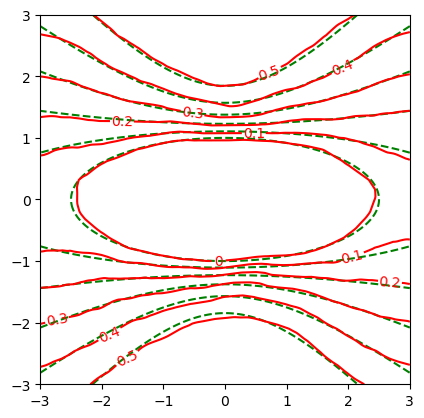

100%|██████████| 8000/8000 [01:01<00:00, 129.15it/s]


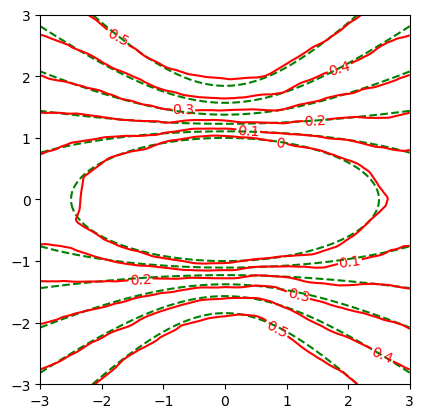

100%|██████████| 8000/8000 [01:00<00:00, 132.38it/s]


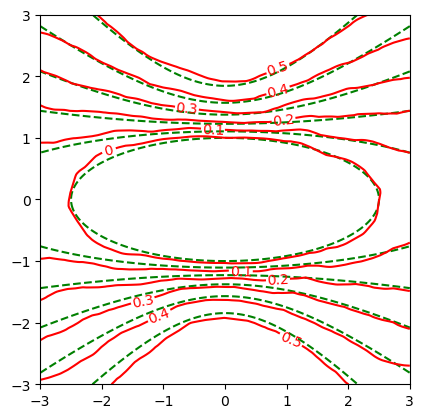

100%|██████████| 8000/8000 [00:59<00:00, 135.45it/s]


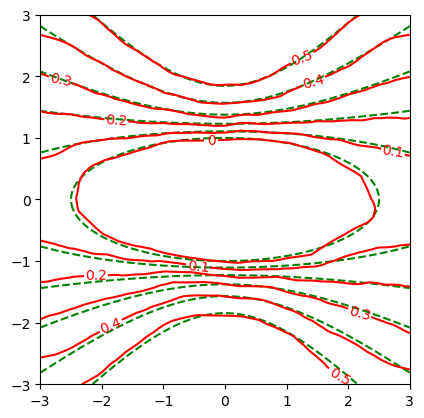

100%|██████████| 8000/8000 [00:57<00:00, 138.77it/s]


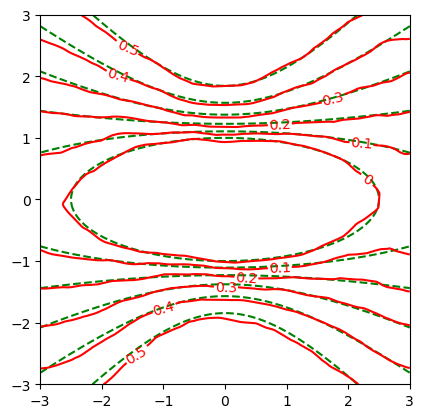

100%|██████████| 8000/8000 [01:09<00:00, 115.72it/s]


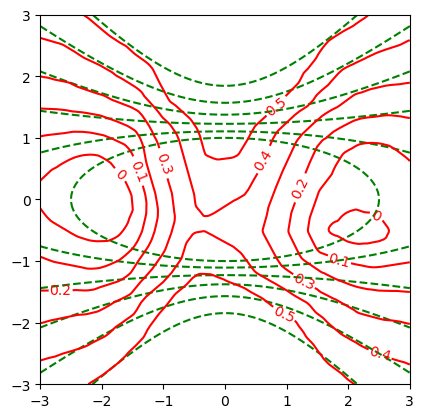

100%|██████████| 8000/8000 [01:12<00:00, 110.20it/s]


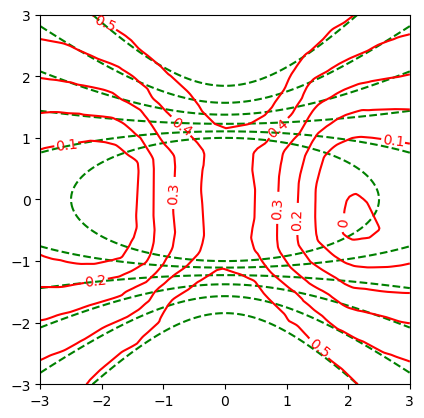

100%|██████████| 8000/8000 [01:20<00:00, 99.14it/s] 


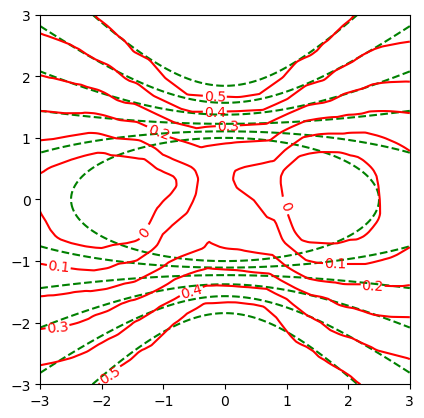

100%|██████████| 8000/8000 [01:15<00:00, 105.32it/s]


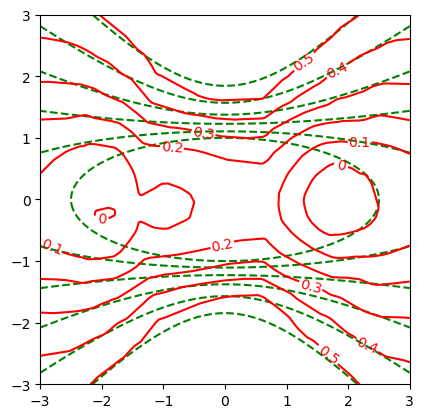

100%|██████████| 8000/8000 [01:11<00:00, 112.05it/s]


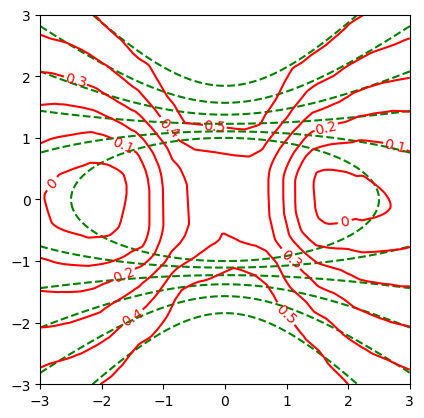

100%|██████████| 8000/8000 [01:09<00:00, 115.39it/s]


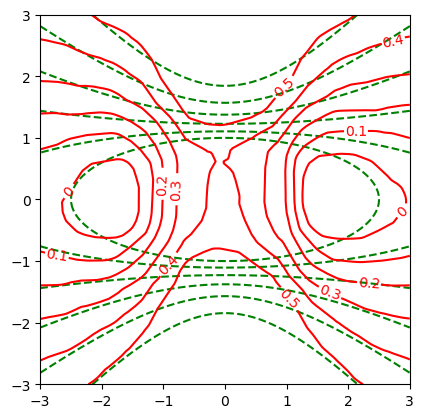

100%|██████████| 8000/8000 [01:09<00:00, 115.87it/s]


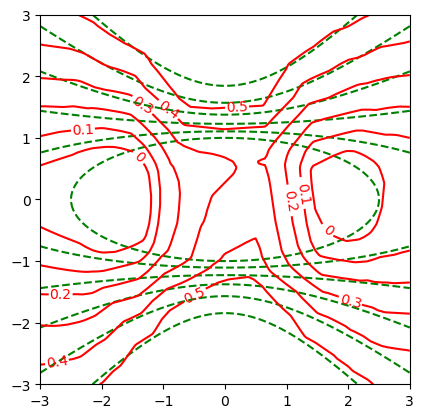

100%|██████████| 8000/8000 [01:10<00:00, 113.11it/s]


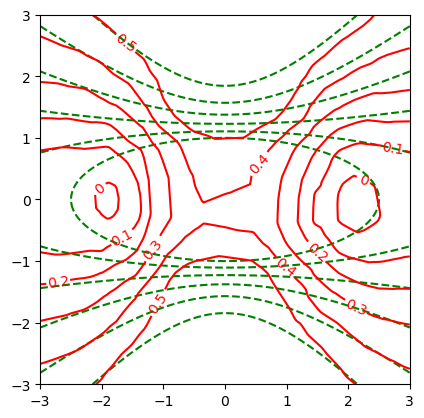

100%|██████████| 8000/8000 [01:19<00:00, 100.70it/s]


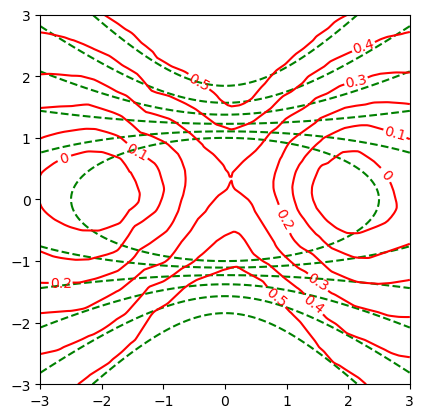

100%|██████████| 8000/8000 [01:16<00:00, 104.10it/s]


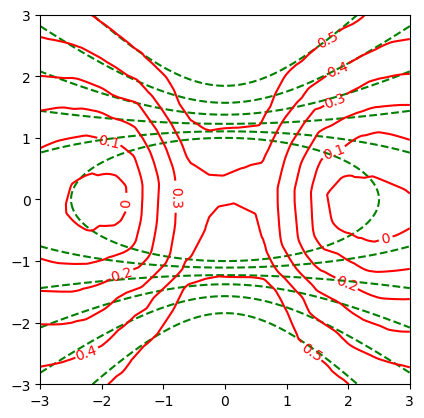

100%|██████████| 8000/8000 [02:14<00:00, 59.69it/s]


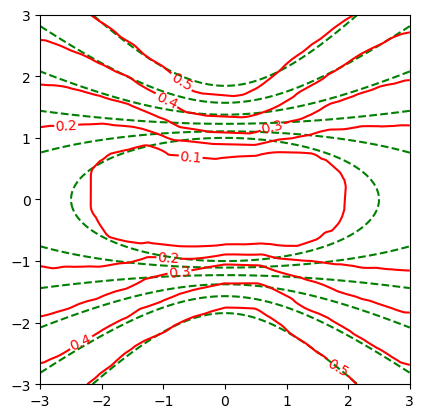

100%|██████████| 8000/8000 [01:30<00:00, 88.80it/s] 


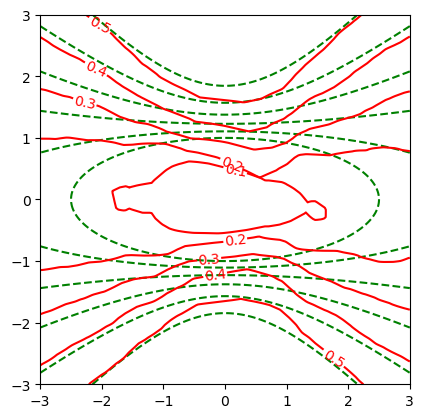

100%|██████████| 8000/8000 [01:32<00:00, 86.35it/s] 


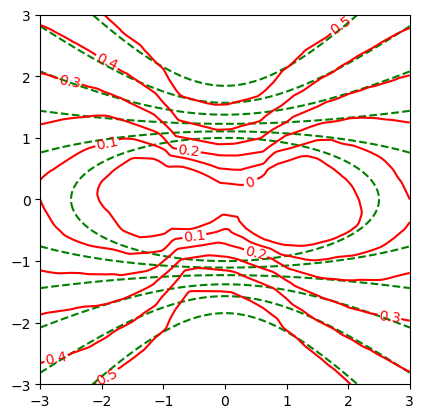

100%|██████████| 8000/8000 [01:32<00:00, 86.48it/s] 


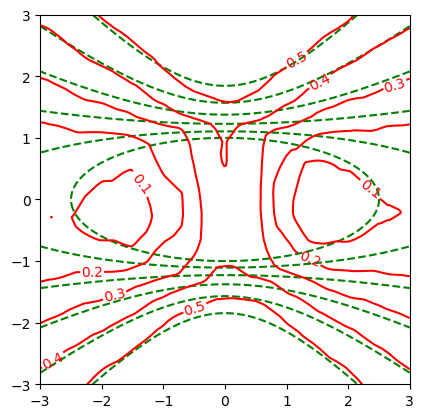

100%|██████████| 8000/8000 [01:38<00:00, 81.53it/s]


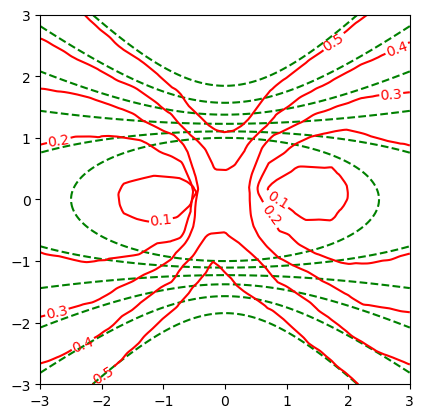

100%|██████████| 8000/8000 [01:40<00:00, 79.23it/s]


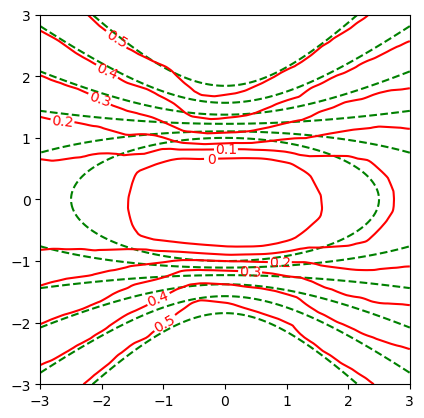

100%|██████████| 8000/8000 [01:49<00:00, 73.23it/s]


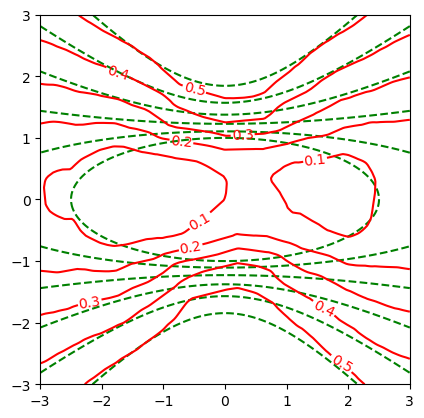

100%|██████████| 8000/8000 [01:43<00:00, 77.10it/s]


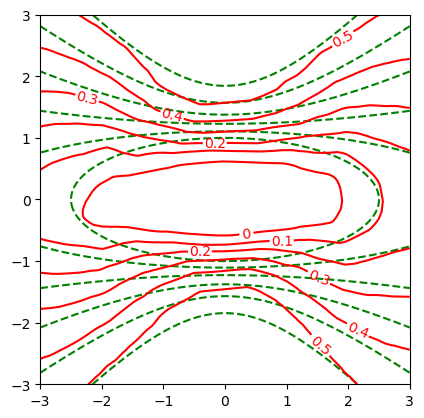

100%|██████████| 8000/8000 [01:33<00:00, 85.28it/s] 


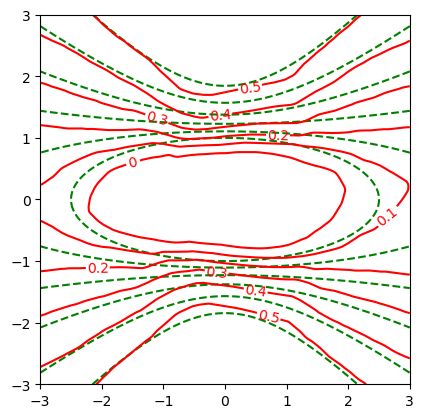

100%|██████████| 8000/8000 [01:31<00:00, 87.52it/s] 


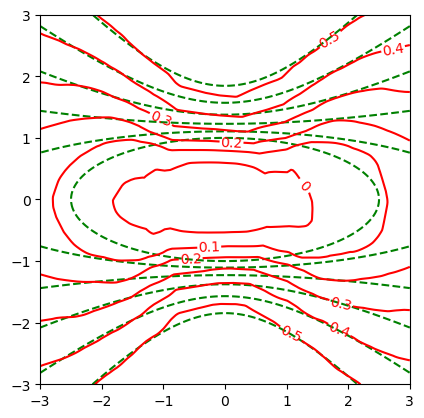

100%|██████████| 20000/20000 [04:09<00:00, 80.07it/s]


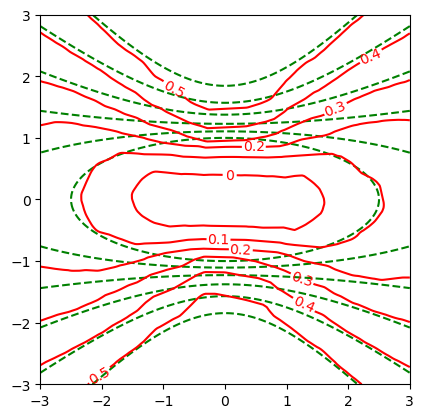

100%|██████████| 20000/20000 [04:07<00:00, 80.88it/s]


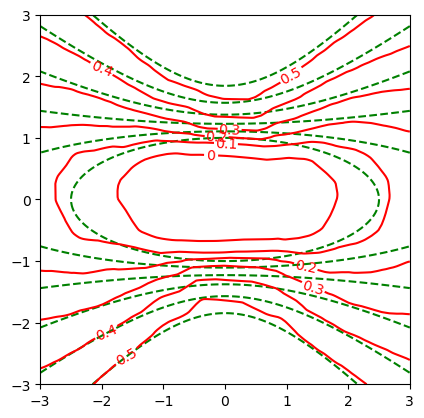

100%|██████████| 20000/20000 [03:56<00:00, 84.42it/s]


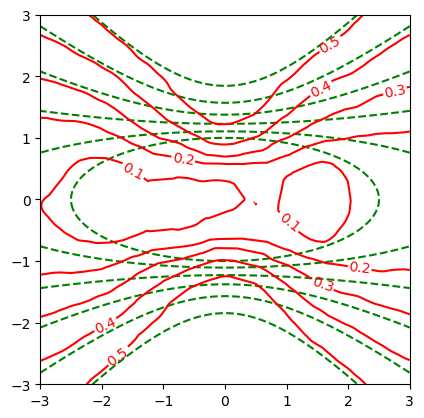

100%|██████████| 20000/20000 [03:54<00:00, 85.25it/s] 


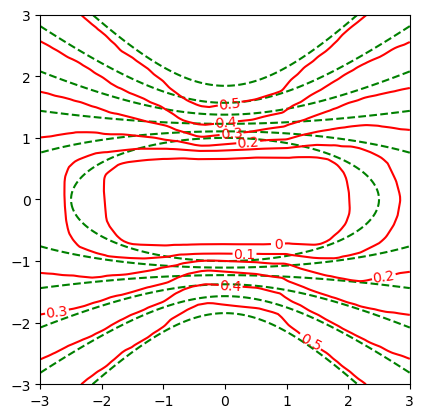

100%|██████████| 20000/20000 [04:04<00:00, 81.92it/s] 


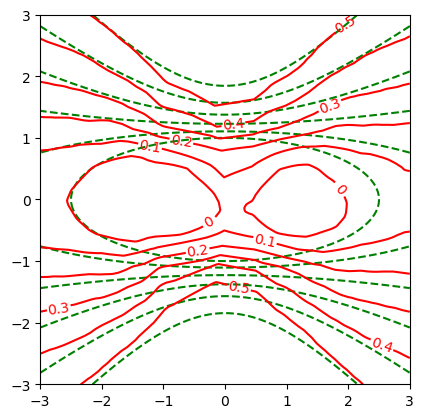

100%|██████████| 20000/20000 [04:10<00:00, 79.89it/s] 


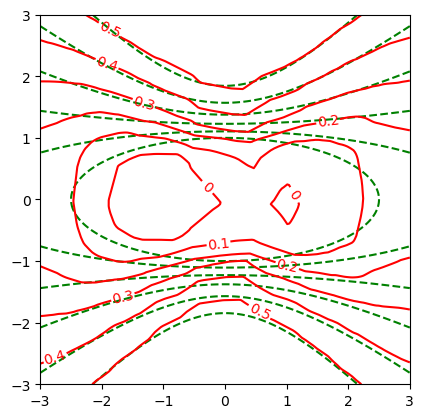

100%|██████████| 20000/20000 [04:08<00:00, 80.43it/s]


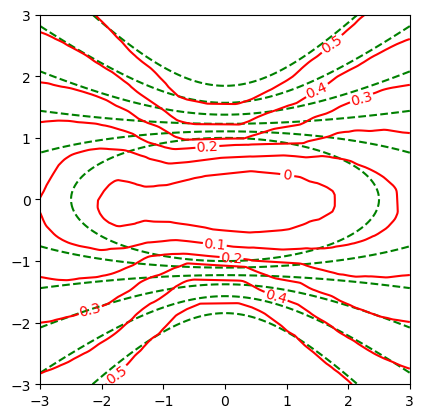

100%|██████████| 20000/20000 [04:02<00:00, 82.47it/s]


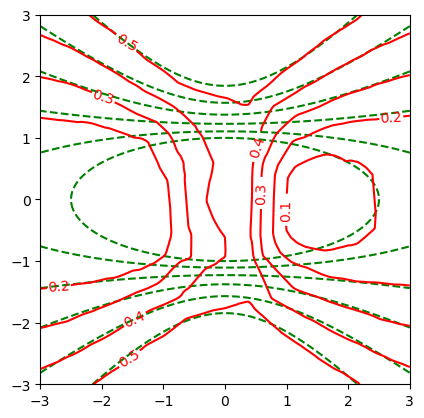

100%|██████████| 20000/20000 [03:51<00:00, 86.43it/s] 


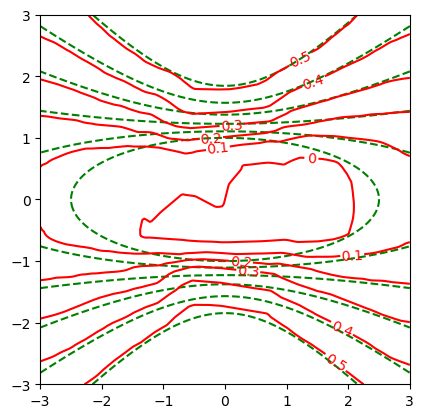

100%|██████████| 20000/20000 [03:56<00:00, 84.72it/s] 


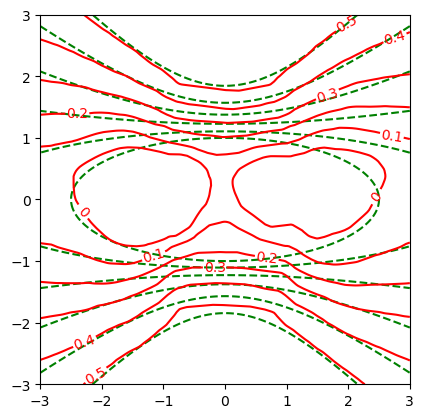

In [3]:
from Training.training import train_time_dependent
from error_test.error_Riccati import error_Riccati, Riccati_diff_Eq

R_loss = torch.zeros([n_experiments, rounds])
L_loss = torch.zeros([n_experiments, rounds])
run_times = torch.zeros([n_experiments])

MSE_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
L_inf_error_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
run_times = torch.zeros([n_experiments, n_experiments_rep])


for j in range(n_experiments):

    dim = dim_list[j]
    
    # Initial condition
    a = torch.ones([1,dim])
    a[:,0] = 4/25
    a[:,1] = 1

    def g(X):
        x = X[:, 1:]
        Ax = a*x 
        return .5*((x*Ax).sum(-1) - 1.)

    training_params['g'] = g
    
    n_t = 6
    P0 = np.diag(a[0])

    for k in range(n_experiments_rep):
        # Finite-difference PINNs
        domain = data_gen_cube_T(side_length, T, dim_list[j])
 
        if len(arch_list[j]) == 2:        
            NN = FCFF_3L([dim_list[j]+1] + arch_list[j])
        else:
            NN = FCFF_4L([dim_list[j]+1] + arch_list[j])
        
        training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .005, momentum = .2)
        
        time = 0.
        
        for i in range(rounds):
            
            training_params['alpha'] = alpha_list[j][i]
            training_params['delta x'] = delta_x_list[j][i]
            training_params['delta t'] = delta_t_list[j][i]
            
            training_params['n_coloc_points'] = N_col_list[j][i]
            training_params['n_boundary_points'] = N_b_list[j][i]
            training_params['num_iterations'] = num_iterations_list[j][i]
            
            t0 = t()
            total_loss, PDE_loss, boundary_loss = train_time_dependent(NN, domain, training_params)
            time += t() - t0

            MC_points = int(1e6) # Number of grid points for comparison with the ground truth
            MSE, L_inf = error_Riccati(NN, P0, side_length, T, MC_points, n_t)
            
            MSE_history[j,k,i] = MSE
            L_inf_error_history[j,k,i] = L_inf

        X_axis = 0
        Y_axis = 1
        n_grid = 200
        P_t = Riccati_diff_Eq(T, P0, n_t, dim)
        plot_level_set_time_dependent(X_axis, Y_axis, NN, n_grid, n_t, side_length, T, P_t_Riccati = P_t) 
        run_times[j,k] = time

In [4]:
MSE_average = MSE_history.mean(1)
MSE_std = MSE_history.std(1)

Linf_average = L_inf_error_history.mean(1)
Linf_std = L_inf_error_history.std(1)

run_time_avg = run_times.mean(1) 

import pandas as pd
import numpy as np

training_features = pd.DataFrame({'Dimension': dim_list,
                                  'Architecture': arch_list,
                                  'delta x': delta_x_list,
                                  'delta t': delta_t_list,
                                  'alpha': alpha_list,
                                  'N': N_col_list,
                                  'N_b': N_b_list,
                                  'Iterations': num_iterations_list})

run_T = pd.DataFrame({'Runtime (s)': np.array(run_time_avg)}).astype('int')

results_MSE = pd.DataFrame(np.array(MSE_average))
results_Linf = pd.DataFrame(np.array(Linf_average))


display('Mean Square Error', training_features.join(results_MSE).join(run_T).transpose())
display('L-infinity Error', training_features.join(results_Linf).join(run_T).transpose())


#One table

MSE = np.array(MSE_history[:,:,-1])
L_inf_error = np.array(L_inf_error_history[:,:,-1])

data_MSE = pd.DataFrame(MSE.transpose())
means_MSE = data_MSE.mean()
stds_MSE = data_MSE.std()

data_Linf = pd.DataFrame(L_inf_error.transpose())
means_Linf = data_Linf.mean()
stds_Linf = data_Linf.std()

summary_df = pd.DataFrame({
    'MSE': means_MSE.round(3).astype(str) + ' ± ' + stds_MSE.round(3).astype(str),
    'L_inf': means_Linf.round(3).astype(str) + ' ± ' + stds_Linf.round(3).astype(str)
})

display(training_features.join(summary_df).join(run_T).transpose())

'Mean Square Error'

0                         1  \
Dimension                            2                         2   
Architecture                  [50, 50]              [50, 50, 50]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
0                             0.079587                  0.080829   
1                             0.019054                  0.014843   
2                             0.007803                   0.00574   
3                             0.007741                   0.00519   
Runtime (s)                         60                        62   

                                     2                         3  \
Dimension                            2                         5   
Architecture              [50, 50, 50]                  [80, 80]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 3000, 5000, 8000]  [8000, 8000, 8000, 8000]   
0                             0.081191                  0.256172   
1                             0.012937                  0.075338   
2                             0.003749                  0.023903   
3                             0.002402                  0.021492   
Runtime (s)                        137                       294   

                                     4                            5  
Dimension                            5                            5  
Architecture              [80, 80, 80]                 [80, 80, 80]  
delta x           [0.5, 0.3, 0.2, 0.1]         [0.5, 0.3, 0.2, 0.1]  
delta t       [0.05, 0.03, 0.02, 0.01]     [0.05, 0.03, 0.02, 0.01]  
alpha             [2.5, 2.0, 1.5, 1.0]         [2.5, 2.0, 1.5, 1.0]  
N                 [200, 200, 200, 200]         [200, 200, 200, 200]  
N_b                   [40, 40, 40, 40]             [40, 40, 40, 40]  
Iterations    [8000, 8000, 8000, 8000]  [8000, 10000, 15000, 20000]  
0                             0.282787                     0.258657  
1                             0.076326                     0.067039  
2                              0.02391                     0.018427  
3                             0.012398                     0.008931  
Runtime (s)                        402                          643

'L-infinity Error'

0                         1  \
Dimension                            2                         2   
Architecture                  [50, 50]              [50, 50, 50]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
0                             1.838957                  1.829925   
1                             1.137793                  1.061385   
2                             0.842547                  0.727471   
3                             0.671811                   0.59577   
Runtime (s)                         60                        62   

                                     2                         3  \
Dimension                            2                         5   
Architecture              [50, 50, 50]                  [80, 80]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 3000, 5000, 8000]  [8000, 8000, 8000, 8000]   
0                             1.819266                  2.324364   
1                             0.985605                  1.788017   
2                             0.666405                  1.535479   
3                             0.462716                    1.5786   
Runtime (s)                        137                       294   

                                     4                            5  
Dimension                            5                            5  
Architecture              [80, 80, 80]                 [80, 80, 80]  
delta x           [0.5, 0.3, 0.2, 0.1]         [0.5, 0.3, 0.2, 0.1]  
delta t       [0.05, 0.03, 0.02, 0.01]     [0.05, 0.03, 0.02, 0.01]  
alpha             [2.5, 2.0, 1.5, 1.0]         [2.5, 2.0, 1.5, 1.0]  
N                 [200, 200, 200, 200]         [200, 200, 200, 200]  
N_b                   [40, 40, 40, 40]             [40, 40, 40, 40]  
Iterations    [8000, 8000, 8000, 8000]  [8000, 10000, 15000, 20000]  
0                             2.294718                     2.358113  
1                             1.585218                     1.586117  
2                             1.342059                       1.1829  
3                             1.422135                     1.130296  
Runtime (s)                        402                          643

0                         1  \
Dimension                            2                         2   
Architecture                  [50, 50]              [50, 50, 50]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 2000, 2000, 2000]  [2000, 2000, 2000, 2000]   
MSE                      0.008 ± 0.002             0.005 ± 0.002   
L_inf                    0.672 ± 0.102             0.596 ± 0.088   
Runtime (s)                         60                        62   

                                     2                         3  \
Dimension                            2                         5   
Architecture              [50, 50, 50]                  [80, 80]   
delta x           [0.5, 0.3, 0.2, 0.1]      [0.5, 0.3, 0.2, 0.1]   
delta t       [0.05, 0.03, 0.02, 0.01]  [0.05, 0.03, 0.02, 0.01]   
alpha             [2.5, 2.0, 1.5, 1.0]      [2.5, 2.0, 1.5, 1.0]   
N                 [200, 200, 200, 200]      [200, 200, 200, 200]   
N_b                   [40, 40, 40, 40]          [40, 40, 40, 40]   
Iterations    [2000, 3000, 5000, 8000]  [8000, 8000, 8000, 8000]   
MSE                      0.002 ± 0.001             0.021 ± 0.006   
L_inf                    0.463 ± 0.093             1.579 ± 0.257   
Runtime (s)                        137                       294   

                                     4                            5  
Dimension                            5                            5  
Architecture              [80, 80, 80]                 [80, 80, 80]  
delta x           [0.5, 0.3, 0.2, 0.1]         [0.5, 0.3, 0.2, 0.1]  
delta t       [0.05, 0.03, 0.02, 0.01]     [0.05, 0.03, 0.02, 0.01]  
alpha             [2.5, 2.0, 1.5, 1.0]         [2.5, 2.0, 1.5, 1.0]  
N                 [200, 200, 200, 200]         [200, 200, 200, 200]  
N_b                   [40, 40, 40, 40]             [40, 40, 40, 40]  
Iterations    [8000, 8000, 8000, 8000]  [8000, 10000, 15000, 20000]  
MSE                      0.012 ± 0.003                0.009 ± 0.002  
L_inf                    1.422 ± 0.323                 1.13 ± 0.261  
Runtime (s)                        402                          643

In [5]:
print(training_features[['Dimension', 'Architecture', 'Iterations']].join(summary_df).join(run_T).to_latex())

\begin{tabular}{lrllllr}
\toprule
 & Dimension & Architecture & Iterations & MSE & L_inf & Runtime (s) \\
\midrule
0 & 2 & [50, 50] & [2000, 2000, 2000, 2000] & 0.008 ± 0.002 & 0.672 ± 0.102 & 60 \\
1 & 2 & [50, 50, 50] & [2000, 2000, 2000, 2000] & 0.005 ± 0.002 & 0.596 ± 0.088 & 62 \\
2 & 2 & [50, 50, 50] & [2000, 3000, 5000, 8000] & 0.002 ± 0.001 & 0.463 ± 0.093 & 137 \\
3 & 5 & [80, 80] & [8000, 8000, 8000, 8000] & 0.021 ± 0.006 & 1.579 ± 0.257 & 294 \\
4 & 5 & [80, 80, 80] & [8000, 8000, 8000, 8000] & 0.012 ± 0.003 & 1.422 ± 0.323 & 402 \\
5 & 5 & [80, 80, 80] & [8000, 10000, 15000, 20000] & 0.009 ± 0.002 & 1.13 ± 0.261 & 643 \\
\bottomrule
\end{tabular}



<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_46268\1659529571.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_46268\1659529571.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


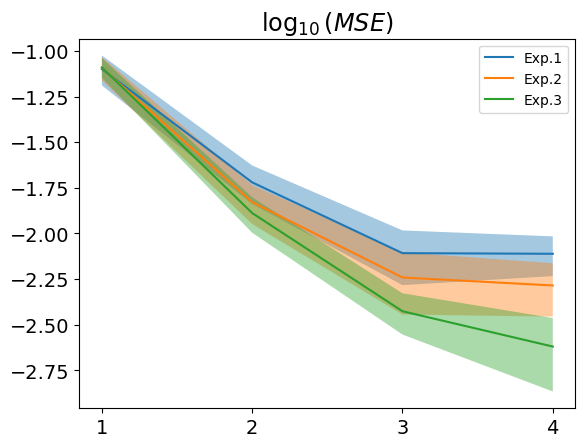

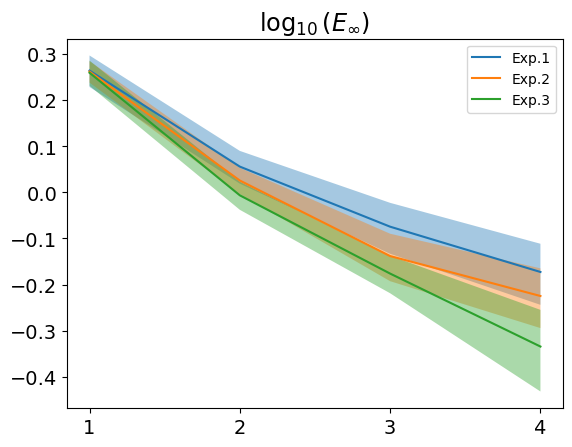

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(3):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(3):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_46268\1596278041.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_46268\1596278041.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


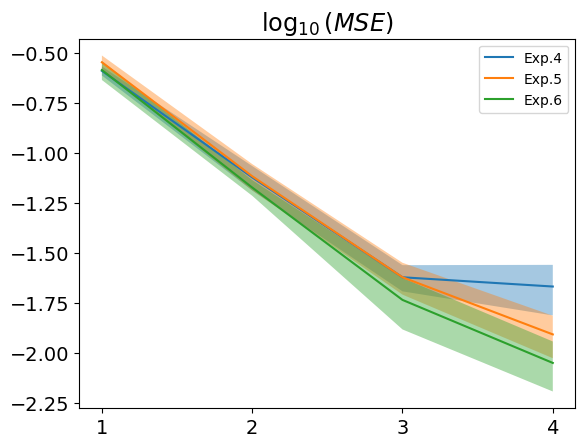

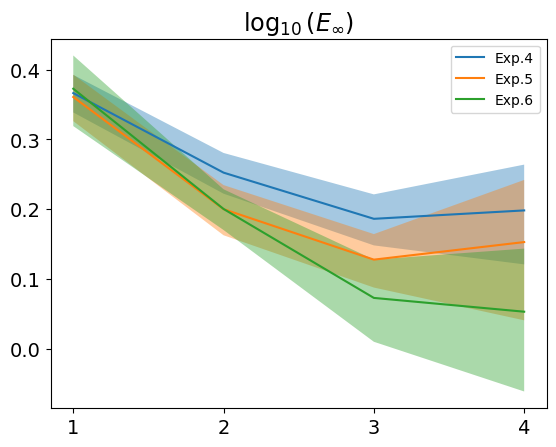

In [7]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(3,6):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(3,6):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()